# **Тема 6. Создание собственных распределений в Python**

Изучите материал из Notebook «Создание собственных распределений в Python».
Рассмотрите функцию (НЕ из рассмотренных в лекции законов НСВ), которая является плотностью вероятности некоторой непрерывной случайной величины (функция плотности должна быть определена в классе).  Для этой случайной величины:

1. проверьте условие нормировки плотности;
2. постройте графики плотности и функции распределения;
3. рассчитайте вероятность попадания случайной величины в некоторый интервал;
4. вычислите математическое ожидание, дисперсию и среднее квадратическое отклонение;
5. вычислите квантиль уровня q и p%-ную точку случайной величины;
6. определите коэффициент асимметрии и эксцесс.

Рассмотрим распределение НСВ с плотностью:

$$
\varphi(x) =
\begin{cases}
6x(1 - x), & x \in [0, 1] \\
0, & \text{иначе}
\end{cases}
$$

Проверим условие нормировки. Функция плотности должна удовлетворять:

$$
F(x) = \int_{-\infty}^{+\infty} \varphi(x)\,dx = 1
$$

Поскольку $\varphi(x) = 0$ вне $[0,1]$, достаточно вычислить:

$$
\int_0^1 6x(1 - x)\,dx = \int_0^1 (6x - 6x^2)\,dx = \left[3x^2 - 2x^3\right]_0^1 = 3 - 2 = 1
$$

**Условие нормировки выполняется.**

Определим функция распределения (CDF).

* При $x < 0$: $F(x) = 0$
* При $x > 1$: $F(x) = 1$
* При $x \in [0,1]$:


$$
F(x) = \int_0^x 6t(1 - t)\,dt = \left[3t^2 - 2t^3\right]_0^x = 3x^2 - 2x^3
$$

$$
F(x) =
\begin{cases}
0, & x < 0 \\
3x^2 - 2x^3, & 0 \le x \le 1 \\
1, & x > 1
\end{cases}
$$

Вычисление квантиля уровня $q$ предполагает решение этого кубического уравнения:

$$
F(x) = q \quad \Rightarrow \quad 2x^3 - 3x^2 + q = 0
$$

Аналитическое решение существует, но громоздко. Если не определять функцию `_ppf`, то `scipy.stats` автоматически аппроксимирует его численно, используя `_cdf` функцию.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_continuous
from scipy import integrate

## **Проверка условия нормировки**

In [ ]:
from sympy import symbols, integrate as sym_integrate

x = symbols('x')
p_expr = 6 * x * (1 - x)
norm_integral = sym_integrate(p_expr, (x, 0, 1))
print("Аналитическая проверка нормировки:")
print(f"∫ 6x(1 - x) dx = {norm_integral}")

def pdf_func(x):
    return 6 * x * (1 - x) if 0 <= x <= 1 else 0.0

num_integral, err = integrate.quad(pdf_func, 0, 1)
print("\nЧисленная проверка нормировки:")
print(f"∫ 6x(1 - x) dx =  {num_integral:.10f}")

Аналитическая проверка нормировки:
∫ 6x(1 - x) dx = 1

Численная проверка нормировки:
∫ 6x(1 - x) dx =  1.0000000000


In [ ]:
class CustomDist(rv_continuous):

    def _pdf(self, x):
        return np.where((x >= 0) & (x <= 1), 6 * x * (1 - x), 0.0)

    def _cdf(self, x):
        return np.where(x < 0, 0.0,
                        np.where(x > 1, 1.0, 3 * x**2 - 2 * x**3))

custom_dist = CustomDist(a=0.0, b=1.0)

## **Графики плотности и функции распределения**

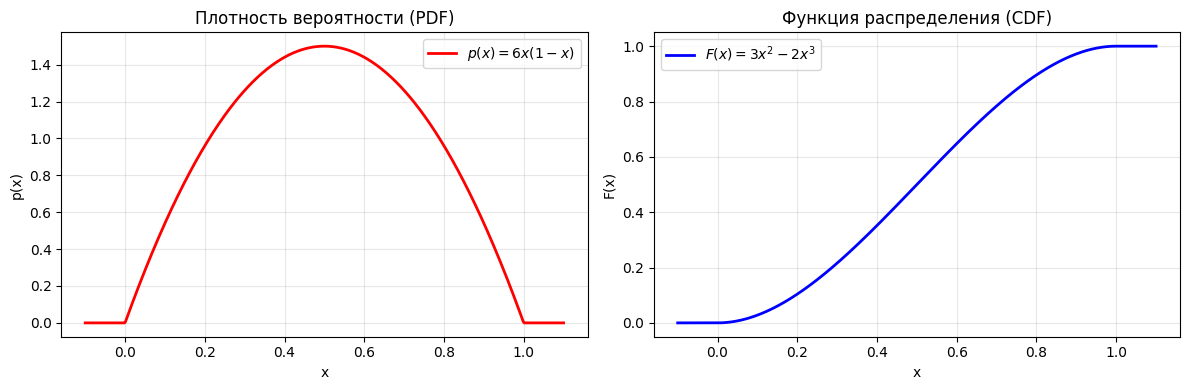

In [ ]:
x_vals = np.linspace(-0.1, 1.1, 500)

plt.figure(figsize=(12, 4))

# PDF
plt.subplot(1, 2, 1)
plt.plot(x_vals, custom_dist.pdf(x_vals), 'r-', lw=2, label=r'$p(x) = 6x(1 - x)$')
plt.title('Плотность вероятности (PDF)')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True, alpha=0.3)
plt.legend()

# CDF
plt.subplot(1, 2, 2)
plt.plot(x_vals, custom_dist.cdf(x_vals), 'b-', lw=2, label=r'$F(x) = 3x^2 - 2x^3$')
plt.title('Функция распределения (CDF)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

## **Вероятность попадания случайной величины в некоторый интервал**

In [ ]:
# P(0.2 < X < 0.8)
a_interval, b_interval = 0.2, 0.8
prob_interval = custom_dist.cdf(b_interval) - custom_dist.cdf(a_interval)
print(f"P({a_interval} < X < {b_interval}) = {prob_interval:.6f}")

P(0.2 < X < 0.8) = 0.792000


## **Математическое ожидание, дисперсия и среднее квадратическое отклонение**

In [ ]:
mean_val = custom_dist.mean()
var_val = custom_dist.var()
std_val = custom_dist.std()
median_val = custom_dist.median()

print(f"Математическое ожидание:            M[X] = {mean_val:.6f}")
print(f"Дисперсия:                          D[X] = {var_val:.6f}")
print(f"Среднее квадратическое отклонение:  σ = {std_val:.6f}")
print(f"Медиана:                            Me = {median_val:.6f}")

Математическое ожидание:            M[X] = 0.500000
Дисперсия:                          D[X] = 0.050000
Среднее квадратическое отклонение:  σ = 0.223607
Медиана:                            Me = 0.500000


## **Квантиль уровня q и p%-ная точка случайной величины**

In [ ]:
q_level = 0.3
p_percent = 0.75

quantile_q = custom_dist.ppf(q_level)
p_point = custom_dist.ppf(p_percent)

print(f"{int(q_level*100)}%-квантиль:     x = {quantile_q:.6f}")
print(f"{int(p_percent*100)}%-ная точка:    x = {p_point:.6f}")

30%-квантиль:     x = 0.363257
75%-ная точка:    x = 0.673648


## **Коэффициент асимметрии и эксцесс**

In [ ]:
mean, var, skew, kurt = custom_dist.stats(moments='mvsk')

print(f"Коэффициент асимметрии:   {skew:.6f}")
print(f"Эксцесс:                  {kurt:.6f}")

Коэффициент асимметрии:   -0.000000
Эксцесс:                  -0.857143
